In [1]:
import os
os.environ["TRANSFORMERS_CACHE"] = "/local/home/hfurquan/myProjects/Leaderboard/cache"
os.environ["HF_HOME"] = "/local/home/hfurquan/myProjects/Leaderboard/cache"
os.environ["CUDA_VISIBLE_DEVICES"] = "2,3"

In [2]:
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor
import torch
model = Qwen2VLForConditionalGeneration.from_pretrained(
        "allenai/olmOCR-7B-0225-preview", 
        torch_dtype=torch.bfloat16
    ).eval()
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/local/home/hfurquan/miniconda3/envs/dialectic-bias/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/local/home/hfurquan/miniconda3/envs/dialectic-bias/lib/python3.11/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46
Loading checkpoint shards: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.26it/s]


Qwen2VLForConditionalGeneration(
  (visual): Qwen2VisionTransformerPretrainedModel(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
    )
    (rotary_pos_emb): VisionRotaryEmbedding()
    (blocks): ModuleList(
      (0-31): 32 x Qwen2VLVisionBlock(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): VisionSdpaAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (mlp): VisionMlp(
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (act): QuickGELUActivation()
          (fc2): Linear(in_features=5120, out_features=1280, bias=True)
        )
      )
    )
    (merger): PatchMerger(
      (ln_q): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (mlp): Seq

Current working directory: /local/home/hfurquan/myProjects/govdocs-api
Attempting to access: /local/home/hfurquan/myProjects/govdocs-api/src/govdocs_api/pdfs/historical_table_example.pdf
File path exists: True


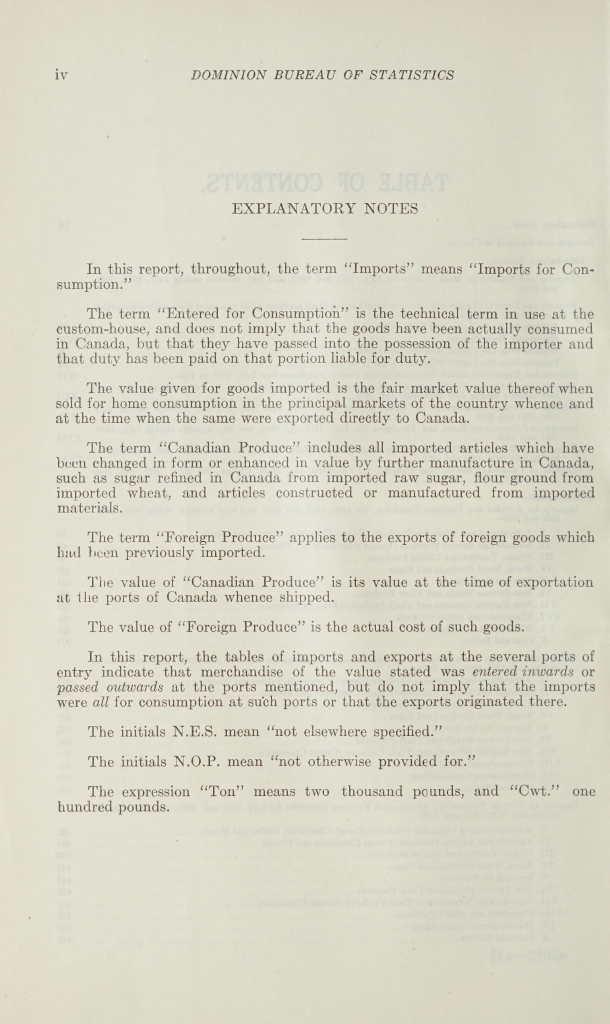

In [5]:
from govdocs_api.utilities.pdf_utilities import render_pdf_to_base64png
from io import BytesIO
from PIL import Image
import base64

image_base64 = render_pdf_to_base64png('/local/home/hfurquan/myProjects/govdocs-api/src/govdocs_api/pdfs/historical_table_example.pdf', 2, target_longest_image_dim=1024)
main_image = Image.open(BytesIO(base64.b64decode(image_base64)))
main_image